In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [2]:
np.random.seed(42)

In [4]:
n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

In [6]:
X.shape

(50, 100)

In [8]:
idx = np.arange(n_features)

In [9]:
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [20]:
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef

In [21]:
coef

array([ 1.        , -0.90483742,  0.81873075, -0.74081822,  0.67032005,
       -0.60653066,  0.54881164, -0.4965853 ,  0.44932896, -0.40656966,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [22]:
y = np.dot(X, coef)

In [23]:
y

array([ 0.06292533,  0.02027361, -1.70569871,  1.0753583 , -2.43238897,
       -2.04075078, -0.77617434, -5.61548163,  3.01026713, -1.80541526,
        2.18524849,  6.60639307, -1.17808822,  0.07039998, -1.53650035,
        0.11732823, -1.60082084, -0.21110408,  1.06922465,  0.44500114,
       -2.04229808, -3.35094382,  3.09433561,  1.21000776, -1.11317592,
        0.58110788, -1.73463265, -0.90387883,  0.79483421, -2.22509342,
        0.02985548, -1.66320825, -1.80811781,  3.12248145,  1.41680322,
        2.89270497,  1.10558166, -1.44496167, -1.00405823,  4.89291424,
       -4.09458174, -1.55472027,  3.35712897, -1.02263181, -2.04358273,
       -1.14022278, -1.05841476,  2.3547126 ,  0.81505857,  0.58889492])

In [24]:
# Add noise
y += 0.01 * np.random.normal(size=n_samples)

In [25]:
# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

In [31]:
print(X_train.shape)
print(y_train.shape)

(25, 100)
(25,)


In [26]:
# #############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : 0.658064


In [27]:
# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


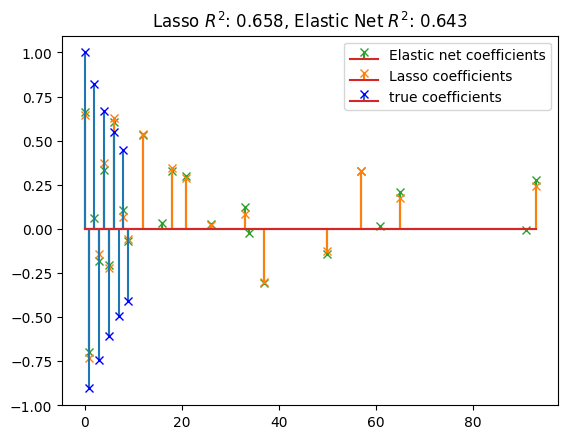

In [29]:
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients')
plt.setp([m, s], color="#2ca02c")

m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')

plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()